# 雛型

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

# 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。  

仮定関数$
h
θ
(
x
)$
 の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。


# 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。  
なお、この数式には正則化項が含まれています。  
＊数式が見切れる場合、DIVERを全画面にして御覧ください。

In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris_dataset = load_iris()#データを抜き出す

X = pd.DataFrame(iris_dataset.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],)# 特徴量をDF化
y = pd.DataFrame(iris_dataset.target, columns=['Species'])# ラベルをDF化
# virgicolorとvirginica　　df_s = df.sort_index()　　df_r = df.reset_index()
y = y.iloc[50:].sort_index()
X = X.iloc[50:].sort_index()
# インデックスを振りなおし、ラベルを0、１に変換
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
y = y.replace(1, 0)
y = y.replace(2, 1)

# display(X.head())
# display(y)
df = pd.concat([X, y], axis=1)
display(df.head())
display(df.tail())

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75)

#　標準化する
scaler = StandardScaler()
scaler.fit(X_train)
# 標準化変形する

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)



,sepal_length,sepal_width,petal_length,petal_width,Species
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


,sepal_length,sepal_width,petal_length,petal_width,Species
95,6.7,3.0,5.2,2.3,1
96,6.3,2.5,5.0,1.9,1
97,6.5,3.0,5.2,2.0,1
98,6.2,3.4,5.4,2.3,1
99,5.9,3.0,5.1,1.8,1


## クラス作成

In [3]:
# 雛型
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=750, lr=0.01, Lambda=1, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter # 学習回数
        self.lr = lr # 学習率
        self.bias = bias # バイアス項の有無
        self.verbose = verbose # 学習記録の有無
        self.Lambda = Lambda #正則化項の定数
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        
        """
        # バイアス項を入れる
        hoge = np.ones((X.shape[0],1))
        if self.bias == False:
            # Xの0列目に１を代入
            X = np.concatenate([hoge,X],axis=1)
            
            #検証用データ有り
            if X_val is not None and y_val is not None:
                hoge_0 = np.ones((X_val.shape[0],1))
                # X_valの0列目に１を代入
                X_val = np.concatenate([hoge_0, X_val],axis=1)
        
        #パラメータの初期値
        np.random.seed(0)
        self.coef_ = np.random.rand(X.shape[1])#[np.newaxis, :]
        self.coef_ = self.coef_[np.newaxis, :]
        
        #カウント
        count = 0
        
        #学習
        for i in range(self.iter):
            
            #sigimoid_func
            y_hat = self._sigmoid(X)
            #errorを定義する
            error = y_hat - y
            #損失をリストに格納していく
            self.loss[i] = self._target_function(X, y)
            #パラメータを更新していく
            self.coef_ = self._gradient_descent(X, error)
            
            #検証用データ有り
            if X_val is not None and y_val is not None:
                #検証用データの損失をリストに格納していく
                self.val_loss[i] = self._target_function(X_val, y_val)
                
            #損失の記録を出力する場合
            if self.verbose == True:
                count += 1
                print('{}回目 : 学習用データの記録 : {}'.format(count, self.loss[i]))
                #検証用データ有り
                if X_val is not None and y_val is not None:
                    print('{}回目 : 検証用データの記録 : {}'.format(count, self.val_loss[i]))
                    
    def predict(self, X, threshold=0.5):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # バイアス項を入れる
        hoge = np.ones((X.shape[0],1))
        if self.bias == False:
            X = np.concatenate([hoge,X],axis=1) # Xの0列目に１を代入
            
        x_sig = np.dot(X, self.coef_.T) # n_sample * 1 
        sigmoid_0 = 1 / (1 + np.exp(-x_sig))
        
        y_pred = np.where(sigmoid_0 >= threshold, 1, 0)
        y_pred = np.ravel(y_pred).T
        return y_pred
        
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # バイアス項を入れる
        hoge = np.ones((X.shape[0],1))
        if self.bias == False:
            X = np.concatenate([hoge,X],axis=1) # Xの0列目に１を代入
            
        x_sig = np.dot(X, self.coef_.T) # n_sample * 1 
        sigmoid_0 = 1 / (1 + np.exp(-x_sig))
        sigmoid_0 = np.ravel(sigmoid_0).T

        return sigmoid_0
    
    
    def _sigmoid(self, X): # 仮定関数sigmoidメソッドを定義する
        '''
        Parmeter
        ----------
        z : ndarray, shape ( n_samples, 1)
        
        Return
        ----------
        シグモイド関数
        '''
        x_sig = np.dot(X, self.coef_.T) # n_sample * 1
        
        return 1 / (1 + np.exp(-x_sig))
    
    def _gradient_descent(self, X, error): # 最急降下法
        """
        X : 次の形のndarray, shape (n_samples, n_features)
                学習用データの特徴量
         error : 次の形のndarray, shape (n_samples, )

        """
        
        #正則化項　(n_samples, 1)
        avatar = np.copy(self.coef_) #(n_feature, 1)
        avatar[0] = 0 #バイアス項は正則化を適用しないので”０”にする
        m = X.shape[0] # Xのn_samples(yの要素数)
        g_d_1 = np.dot(error.T, X) # (n_samples, )
        self.reg_term_0 = (self.Lambda/m) * avatar #(1, n_features)(正則化項)
        
        self.coef_ = self.coef_ - (self.lr / m) * g_d_1 - self.reg_term_0
        
        return self.coef_
    

    def _target_function(self, X, y): # 目的関数(損失関数）
        
        #sigmoidfunctionの返り値
        y_hat = self._sigmoid(X)
        # 要素数(n_samples)
        m = len(y)
        #avatarの0番目に0を代入,バイアス項は正則化を適用しないので0にする
        avatar = np.copy(self.coef_) #(n_feature, 1)
        avatar[0] = 0
        # 正則化項
        self.reg_term_1 = (self.Lambda / 2 * m) * np.sum(avatar**2) #(n_features, )
        # 損失関数の各パーツ
        step1 = -y*np.log(y_hat)
        step2 = 1 - y
        step3 = np.log(1 - y_hat)
        # 損失関数
        objective_function = (np.sum(step1 - step2 * step3)/m ) + self.reg_term_1
        
        return objective_function

# 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。  
scikit-learnによる実装と比べ、正しく動いているかを確認してください。  
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

## Scratch

### 学習

In [4]:
# 学習(biasFalse, verbos=False)
clf_slr = ScratchLogisticRegression(num_iter=500, lr=0.1, bias=False, verbose=True)
clf_slr.fit(X_train_transformed, y_train)

print(clf_slr)


1回目 : 学習用データの記録 : 0.4082729792335787
2回目 : 学習用データの記録 : 0.402700710478789
3回目 : 学習用データの記録 : 0.3973048306022699
4回目 : 学習用データの記録 : 0.3920762582240532
5回目 : 学習用データの記録 : 0.38700657224099333
6回目 : 学習用データの記録 : 0.3820879514879058
7回目 : 学習用データの記録 : 0.3773131208164342
8回目 : 学習用データの記録 : 0.37267530283109723
9回目 : 学習用データの記録 : 0.36816817461978846
10回目 : 学習用データの記録 : 0.36378582890043887
11回目 : 学習用データの記録 : 0.3595227390785245
12回目 : 学習用データの記録 : 0.3553737277732164
13回目 : 学習用データの記録 : 0.35133393842465077
14回目 : 学習用データの記録 : 0.34739880964220565
15回目 : 学習用データの記録 : 0.34356405199484885
16回目 : 学習用データの記録 : 0.33982562698042645
17回目 : 学習用データの記録 : 0.33617972794193646
18回目 : 学習用データの記録 : 0.33262276272602087
19回目 : 学習用データの記録 : 0.32915133790264994
20回目 : 学習用データの記録 : 0.32576224438573087
21回目 : 学習用データの記録 : 0.3224524443125539
22回目 : 学習用データの記録 : 0.31921905905593084
23回目 : 学習用データの記録 : 0.31605935825688053
24回目 : 学習用データの記録 : 0.3129707497780279
25回目 : 学習用データの記録 : 0.30995077048872344
26回目 : 学習用データの記録 : 0.30699707780245167
27回目 :

230回目 : 学習用データの記録 : 0.12304705765464052
231回目 : 学習用データの記録 : 0.12277398413149053
232回目 : 学習用データの記録 : 0.12250277093276263
233回目 : 学習用データの記録 : 0.12223339884277659
234回目 : 学習用データの記録 : 0.12196584890533067
235回目 : 学習用データの記録 : 0.1217001024194041
236回目 : 学習用データの記録 : 0.12143614093494484
237回目 : 学習用データの記録 : 0.121173946248739
238回目 : 学習用データの記録 : 0.1209135004003614
239回目 : 学習用データの記録 : 0.12065478566820428
240回目 : 学習用データの記録 : 0.12039778456558342
241回目 : 学習用データの記録 : 0.12014247983691927
242回目 : 学習用データの記録 : 0.1198888544539916
243回目 : 学習用データの記録 : 0.1196368916122661
244回目 : 学習用データの記録 : 0.1193865747272912
245回目 : 学習用データの記録 : 0.11913788743116377
246回目 : 学習用データの記録 : 0.11889081356906189
247回目 : 学習用データの記録 : 0.11864533719584332
248回目 : 学習用データの記録 : 0.11840144257270843
249回目 : 学習用データの記録 : 0.11815911416392585
250回目 : 学習用データの記録 : 0.11791833663361968
251回目 : 学習用データの記録 : 0.1176790948426169
252回目 : 学習用データの記録 : 0.11744137384535364
253回目 : 学習用データの記録 : 0.11720515888683894
254回目 : 学習用データの記録 : 0.1169704353996749
255回目 : 学

448回目 : 学習用データの記録 : 0.08864591997677725
449回目 : 学習用データの記録 : 0.08855405265306854
450回目 : 学習用データの記録 : 0.08846252454271847
451回目 : 学習用データの記録 : 0.08837133363514964
452回目 : 学習用データの記録 : 0.0882804779358102
453回目 : 学習用データの記録 : 0.08818995546601507
454回目 : 学習用データの記録 : 0.0880997642627891
455回目 : 学習用データの記録 : 0.0880099023787119
456回目 : 学習用データの記録 : 0.08792036788176477
457回目 : 学習用データの記録 : 0.08783115885517902
458回目 : 学習用データの記録 : 0.08774227339728653
459回目 : 学習用データの記録 : 0.08765370962137153
460回目 : 学習用データの記録 : 0.08756546565552469
461回目 : 学習用データの記録 : 0.08747753964249834
462回目 : 学習用データの記録 : 0.08738992973956386
463回目 : 学習用データの記録 : 0.0873026341183703
464回目 : 学習用データの記録 : 0.08721565096480495
465回目 : 学習用データの記録 : 0.08712897847885535
466回目 : 学習用データの記録 : 0.08704261487447279
467回目 : 学習用データの記録 : 0.08695655837943786
468回目 : 学習用データの記録 : 0.08687080723522689
469回目 : 学習用データの記録 : 0.08678535969688038
470回目 : 学習用データの記録 : 0.08670021403287272
471回目 : 学習用データの記録 : 0.08661536852498346
472回目 : 学習用データの記録 : 0.0865308214681702
473回目

### predict

In [5]:
#推定
clf_slr_predict = clf_slr.predict(X_test_transformed)
print(clf_slr_predict)

[0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1]


### predict_proba

In [6]:
#proba
clf_slr_predict_proba = clf_slr.predict_proba(X_test_transformed)
print(clf_slr_predict_proba)

[3.81324664e-02 9.95505861e-01 1.78977165e-04 9.84984893e-01
 9.94951402e-01 1.82510227e-03 6.37595090e-02 5.29294123e-03
 9.99977006e-01 9.33109231e-01 5.23775085e-01 2.31518481e-04
 6.98352223e-01 9.90760802e-01 2.20965280e-02 8.86844463e-03
 3.40595966e-03 3.64115550e-01 5.67175459e-01 9.94556240e-01
 1.39588955e-02 2.81215085e-01 4.39160017e-01 2.53628016e-01
 9.37685355e-01]


### 指標値

In [7]:
# 5つの指標を出力する関数
def index_5(predict_train, data_name): #predict_train=predict(X_test), data_name=file_name
    
    ind_5 = {"Accuracy" : [accuracy_score(y_test, predict_train)*100],
            "Precision" : [precision_score(y_test, predict_train)*100],
            "Recall" : [recall_score(y_test, predict_train)*100],
            "F1" : [f1_score(y_test, predict_train)],
            "ConfusionMatrix" : [confusion_matrix(y_test, predict_train)]
            }
    index1 = [data_name]
    result = pd.DataFrame(data=ind_5, index=index1)
    
    return result

In [8]:
scratch = index_5(clf_slr_predict, 'Scratch')
display(scratch)

,Accuracy,Precision,Recall,F1,ConfusionMatrix
Scratch,88.0,100.0,78.571429,0.88,"[[11, 0], [3, 11]]"


### coef_

In [9]:
clf_slr.coef_

array([[-0.19996255,  0.18289767, -0.74788835,  2.55389222,  2.49762619]])

## scikit_learn

### 学習、推定

In [10]:
 # データを学習させる 
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train_transformed, y_train) #訓練用データを学習させる
# ロジスティック回帰モデルによる検証用データで予測する
clf_predict = clf.predict(X_test_transformed) 
print(clf_predict)
print(type(clf))

[0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1]
<class 'sklearn.linear_model.logistic.LogisticRegression'>


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Predict_Proba

In [11]:
clf_predict_proba = clf.predict_proba(X_test_transformed)
print(clf_predict_proba)

[[9.67085810e-01 3.29141902e-02]
 [4.47856610e-03 9.95521434e-01]
 [9.99804702e-01 1.95298113e-04]
 [1.85086494e-02 9.81491351e-01]
 [6.20555668e-03 9.93794443e-01]
 [9.98215237e-01 1.78476280e-03]
 [9.42635938e-01 5.73640622e-02]
 [9.95935776e-01 4.06422383e-03]
 [2.61855021e-05 9.99973814e-01]
 [5.55581979e-02 9.44441802e-01]
 [4.93339566e-01 5.06660434e-01]
 [9.99752923e-01 2.47077053e-04]
 [3.22386410e-01 6.77613590e-01]
 [7.98870796e-03 9.92011292e-01]
 [9.77740744e-01 2.22592562e-02]
 [9.90997497e-01 9.00250251e-03]
 [9.97032901e-01 2.96709949e-03]
 [6.53119167e-01 3.46880833e-01]
 [4.57052700e-01 5.42947300e-01]
 [5.29774107e-03 9.94702259e-01]
 [9.85367114e-01 1.46328862e-02]
 [6.36534965e-01 3.63465035e-01]
 [5.74011276e-01 4.25988724e-01]
 [7.61368609e-01 2.38631391e-01]
 [6.45199523e-02 9.35480048e-01]]


### 指標値

In [12]:
sklearn = index_5(clf_predict, 'Scikitlearn')
display(sklearn)

,Accuracy,Precision,Recall,F1,ConfusionMatrix
Scikitlearn,88.0,100.0,78.571429,0.88,"[[11, 0], [3, 11]]"


### 比較

In [13]:
pd.concat([scratch, sklearn])

,Accuracy,Precision,Recall,F1,ConfusionMatrix
Scratch,88.0,100.0,78.571429,0.88,"[[11, 0], [3, 11]]"
Scikitlearn,88.0,100.0,78.571429,0.88,"[[11, 0], [3, 11]]"


## バイアス項なし, 出力なし

In [14]:
# 学習(bias=True, verbos=False)
clf_slr_0 = ScratchLogisticRegression(num_iter=500, lr=0.1, bias=True, verbose=False)
clf_slr_0.fit(X_train_transformed, y_train)

In [15]:
# 推定
clf_slr_0.predict(X_test_transformed)

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1])

In [16]:
# proba
clf_slr_0.predict_proba(X_test_transformed)

array([4.67803712e-02, 9.96392308e-01, 2.12711983e-04, 9.87629275e-01,
       9.95805292e-01, 2.11601605e-03, 7.69277021e-02, 6.28349738e-03,
       9.99979573e-01, 9.43594403e-01, 5.78768330e-01, 2.69800826e-04,
       7.32832827e-01, 9.92582820e-01, 2.70471915e-02, 1.04685002e-02,
       3.74243463e-03, 4.08054168e-01, 6.12402066e-01, 9.95516192e-01,
       1.60254560e-02, 3.27037805e-01, 4.95454224e-01, 2.72355816e-01,
       9.47053183e-01])

In [17]:
# coef_
clf_slr_0.coef_

array([[ 0.14388068, -0.70333863,  2.57148701,  2.50042552]])

## バイアス項あり、学習過程を出力

In [18]:
#学習
slr= ScratchLogisticRegression(num_iter=500, lr=0.1,verbose=True)
loss = slr.fit(X_train_transformed, y_train, X_test_transformed, y_test)

1回目 : 学習用データの記録 : 0.4082729792335787
1回目 : 検証用データの記録 : 0.40110340350447543
2回目 : 学習用データの記録 : 0.402700710478789
2回目 : 検証用データの記録 : 0.3987683949425781
3回目 : 学習用データの記録 : 0.3973048306022699
3回目 : 検証用データの記録 : 0.39650639310993796
4回目 : 学習用データの記録 : 0.3920762582240532
4回目 : 検証用データの記録 : 0.39431259186962253
5回目 : 学習用データの記録 : 0.38700657224099333
5回目 : 検証用データの記録 : 0.39218261389711456
6回目 : 学習用データの記録 : 0.3820879514879058
6回目 : 検証用データの記録 : 0.3901124655484553
7回目 : 学習用データの記録 : 0.3773131208164342
7回目 : 検証用データの記録 : 0.3880984971360604
8回目 : 学習用データの記録 : 0.37267530283109723
8回目 : 検証用データの記録 : 0.3861373678890086
9回目 : 学習用データの記録 : 0.36816817461978846
9回目 : 検証用データの記録 : 0.3842260149807579
10回目 : 学習用データの記録 : 0.36378582890043887
10回目 : 検証用データの記録 : 0.3823616260965458
11回目 : 学習用データの記録 : 0.3595227390785245
11回目 : 検証用データの記録 : 0.3805416150880267
12回目 : 学習用データの記録 : 0.3553737277732164
12回目 : 検証用データの記録 : 0.37876360032635487
13回目 : 学習用データの記録 : 0.35133393842465077
13回目 : 検証用データの記録 : 0.3770253854188529
14回目 : 学習用データの記録 : 0.

108回目 : 学習用データの記録 : 0.18059276719039197
108回目 : 検証用データの記録 : 0.28640580768872487
109回目 : 学習用データの記録 : 0.17978704610922341
109回目 : 検証用データの記録 : 0.2858422157508734
110回目 : 学習用データの記録 : 0.17899063709858878
110回目 : 検証用データの記録 : 0.2852834206426468
111回目 : 学習用データの記録 : 0.17820338245189343
111回目 : 検証用データの記録 : 0.284729369366501
112回目 : 学習用データの記録 : 0.17742512795594004
112回目 : 検証用データの記録 : 0.2841800097222167
113回目 : 学習用データの記録 : 0.17665572279493574
113回目 : 検証用データの記録 : 0.283635290287835
114回目 : 学習用データの記録 : 0.17589501945766248
114回目 : 検証用データの記録 : 0.2830951604013407
115回目 : 学習用データの記録 : 0.17514287364768796
115回目 : 検証用データの記録 : 0.28255957014305094
116回目 : 学習用データの記録 : 0.17439914419650113
116回目 : 検証用データの記録 : 0.282028470318674
117回目 : 学習用データの記録 : 0.17366369297946002
117回目 : 検証用データの記録 : 0.2815018124430058
118回目 : 学習用データの記録 : 0.17293638483444546
118回目 : 検証用データの記録 : 0.28097954872422826
119回目 : 学習用データの記録 : 0.17221708748311892
119回目 : 検証用データの記録 : 0.2804616320487827
120回目 : 学習用データの記録 : 0.17150567145468676
120回目 : 検証用デ

230回目 : 学習用データの記録 : 0.12304705765464052
230回目 : 検証用データの記録 : 0.2420811793399877
231回目 : 学習用データの記録 : 0.12277398413149053
231回目 : 検証用データの記録 : 0.24185622219481698
232回目 : 学習用データの記録 : 0.12250277093276263
232回目 : 検証用データの記録 : 0.24163276364788866
233回目 : 学習用データの記録 : 0.12223339884277659
233回目 : 検証用データの記録 : 0.2414107912087347
234回目 : 学習用データの記録 : 0.12196584890533067
234回目 : 検証用データの記録 : 0.24119029251504984
235回目 : 学習用データの記録 : 0.1217001024194041
235回目 : 検証用データの記録 : 0.2409712553311717
236回目 : 学習用データの記録 : 0.12143614093494484
236回目 : 検証用データの記録 : 0.24075366754658112
237回目 : 学習用データの記録 : 0.121173946248739
237回目 : 検証用データの記録 : 0.24053751717442184
238回目 : 学習用データの記録 : 0.1209135004003614
238回目 : 検証用データの記録 : 0.24032279235004014
239回目 : 学習用データの記録 : 0.12065478566820428
239回目 : 検証用データの記録 : 0.24010948132954346
240回目 : 学習用データの記録 : 0.12039778456558342
240回目 : 検証用データの記録 : 0.2398975724883786
241回目 : 学習用データの記録 : 0.12014247983691927
241回目 : 検証用データの記録 : 0.23968705431992754
242回目 : 学習用データの記録 : 0.1198888544539916
242回目 : 検

337回目 : 学習用データの記録 : 0.10156096387532437
337回目 : 検証用データの記録 : 0.22455993255158532
338回目 : 学習用データの記録 : 0.10141374681478102
338回目 : 検証用データの記録 : 0.22444379436317038
339回目 : 学習用データの記録 : 0.10126724689545823
339回目 : 検証用データの記録 : 0.22432832276758763
340回目 : 学習用データの記録 : 0.10112145864623255
340回目 : 検証用データの記録 : 0.22421351322925587
341回目 : 学習用データの記録 : 0.10097637665135137
341回目 : 検証用データの記録 : 0.22409936125164345
342回目 : 学習用データの記録 : 0.10083199554974216
342回目 : 検証用データの記録 : 0.22398586237686824
343回目 : 学習用データの記録 : 0.1006883100343326
343回目 : 検証用データの記録 : 0.22387301218530228
344回目 : 学習用データの記録 : 0.10054531485138025
344回目 : 検証用データの記録 : 0.22376080629518091
345回目 : 学習用データの記録 : 0.10040300479981237
345回目 : 検証用データの記録 : 0.22364924036221656
346回目 : 学習用データの記録 : 0.1002613747305752
346回目 : 検証用データの記録 : 0.22353831007921707
347回目 : 学習用データの記録 : 0.10012041954599266
347回目 : 検証用データの記録 : 0.223428011175708
348回目 : 学習用データの記録 : 0.09998013419913465
348回目 : 検証用データの記録 : 0.22331833941756024
349回目 : 学習用データの記録 : 0.09984051369319455
349回

456回目 : 学習用データの記録 : 0.08792036788176477
456回目 : 検証用データの記録 : 0.21442809613046152
457回目 : 学習用データの記録 : 0.08783115885517902
457回目 : 検証用データの記録 : 0.21436763593057231
458回目 : 学習用データの記録 : 0.08774227339728653
458回目 : 検証用データの記録 : 0.21430749561107595
459回目 : 学習用データの記録 : 0.08765370962137153
459回目 : 検証用データの記録 : 0.2142476733932131
460回目 : 学習用データの記録 : 0.08756546565552469
460回目 : 検証用データの記録 : 0.21418816751087696
461回目 : 学習用データの記録 : 0.08747753964249834
461回目 : 検証用データの記録 : 0.21412897621050422
462回目 : 学習用データの記録 : 0.08738992973956386
462回目 : 検証用データの記録 : 0.21407009775096694
463回目 : 学習用データの記録 : 0.0873026341183703
463回目 : 検証用データの記録 : 0.21401153040346507
464回目 : 学習用データの記録 : 0.08721565096480495
464回目 : 検証用データの記録 : 0.21395327245142068
465回目 : 学習用データの記録 : 0.08712897847885535
465回目 : 検証用データの記録 : 0.2138953221903729
466回目 : 学習用データの記録 : 0.08704261487447279
466回目 : 検証用データの記録 : 0.21383767792787414
467回目 : 学習用データの記録 : 0.08695655837943786
467回目 : 検証用データの記録 : 0.21378033798338703
468回目 : 学習用データの記録 : 0.08687080723522689
468

## バイアス項なし、学習過程を出力

In [19]:
#学習
slr_0= ScratchLogisticRegression(num_iter=500, lr=0.1,bias=True,verbose=True)
slr_0.fit(X_train_transformed, y_train, X_test_transformed, y_test)

1回目 : 学習用データの記録 : 0.3613708150153394
1回目 : 検証用データの記録 : 0.4632102955899884
2回目 : 学習用データの記録 : 0.3575419709507483
2回目 : 検証用データの記録 : 0.459754861598977
3回目 : 学習用データの記録 : 0.3538027252195183
3回目 : 検証用データの記録 : 0.45637317340053046
4回目 : 学習用データの記録 : 0.3501495736485025
4回目 : 検証用データの記録 : 0.45306242819162906
5回目 : 学習用データの記録 : 0.34657922107285427
5回目 : 検証用データの記録 : 0.4498199949630006
6回目 : 学習用データの記録 : 0.34308856476136473
6回目 : 検証用データの記録 : 0.4466434003992154
7回目 : 学習用データの記録 : 0.3396746794206334
7回目 : 検証用データの記録 : 0.4435303161460993
8回目 : 学習用データの記録 : 0.33633480360659473
8回目 : 検証用データの記録 : 0.4404785472976917
9回目 : 学習用データの記録 : 0.3330663273926151
9回目 : 検証用データの記録 : 0.437486021972231
10回目 : 学習用データの記録 : 0.3298667811613219
10回目 : 検証用データの記録 : 0.43455078186177765
11回目 : 学習用データの記録 : 0.3267338254029509
11回目 : 検証用データの記録 : 0.43167097365335894
12回目 : 学習用データの記録 : 0.32366524141660363
12回目 : 検証用データの記録 : 0.428844841231168
13回目 : 学習用データの記録 : 0.32065892282268876
13回目 : 検証用データの記録 : 0.4260707185795796
14回目 : 学習用データの記録 : 0.317

110回目 : 学習用データの記録 : 0.17520565786359912
110回目 : 検証用データの記録 : 0.28452199409220946
111回目 : 学習用データの記録 : 0.17447092183274798
111回目 : 検証用データの記録 : 0.2837661128945015
112回目 : 学習用データの記録 : 0.17374415049558256
112回目 : 検証用データの記録 : 0.28301797690588865
113回目 : 学習用データの記録 : 0.17302522328341835
113回目 : 検証用データの記録 : 0.2822774757012522
114回目 : 学習用データの記録 : 0.17231402191994058
114回目 : 検証用データの記録 : 0.2815445008128845
115回目 : 学習用データの記録 : 0.17161043036839718
115回目 : 検証用データの記録 : 0.28081894568879706
116回目 : 学習用データの記録 : 0.17091433478025828
116回目 : 検証用データの記録 : 0.28010070565210676
117回目 : 学習用データの記録 : 0.17022562344529396
117回目 : 検証用データの記録 : 0.2793896778614634
118回目 : 学習用データの記録 : 0.1695441867430224
118回目 : 検証用データの記録 : 0.2786857612724869
119回目 : 学習用データの記録 : 0.1688699170954827
119回目 : 検証用データの記録 : 0.27798885660018074
120回目 : 学習用データの記録 : 0.16820270892128875
120回目 : 検証用データの記録 : 0.27729886628229244
121回目 : 学習用データの記録 : 0.1675424585909223
121回目 : 検証用データの記録 : 0.2766156944435892
122回目 : 学習用データの記録 : 0.16688906438322498
122回目 : 検

240回目 : 学習用データの記録 : 0.11977674780478867
240回目 : 検証用データの記録 : 0.22612986667832943
241回目 : 学習用データの記録 : 0.11953447564440145
241回目 : 検証用データの記録 : 0.22586798147072373
242回目 : 学習用データの記録 : 0.11929381789113769
242回目 : 検証用データの記録 : 0.22560777625055276
243回目 : 学習用データの記録 : 0.11905475862947315
243回目 : 検証用データの記録 : 0.225349234951451
244回目 : 学習用データの記録 : 0.11881728214622418
244回目 : 検証用データの記録 : 0.22509234170479492
245回目 : 学習用データの記録 : 0.11858137292745236
245回目 : 検証用データの記録 : 0.22483708083678938
246回目 : 学習用データの記録 : 0.11834701565542467
246回目 : 検証用データの記録 : 0.22458343686560306
247回目 : 学習用データの記録 : 0.11811419520562694
247回目 : 検証用データの記録 : 0.224331394498553
248回目 : 学習用データの記録 : 0.11788289664382953
248回目 : 検証用データの記録 : 0.2240809386293364
249回目 : 学習用データの記録 : 0.11765310522320552
249回目 : 検証用データの記録 : 0.22383205433530876
250回目 : 学習用データの記録 : 0.11742480638149831
250回目 : 検証用データの記録 : 0.2235847268748083
251回目 : 学習用データの記録 : 0.11719798573823952
251回目 : 検証用データの記録 : 0.22333894168452534
252回目 : 学習用データの記録 : 0.11697262909201503
252回目 

348回目 : 学習用データの記録 : 0.10051050593633688
348回目 : 検証用データの記録 : 0.2050819903687908
349回目 : 学習用データの記録 : 0.10037987920755477
349回目 : 検証用データの記録 : 0.20493760259507338
350回目 : 学習用データの記録 : 0.10024989091536922
350回目 : 検証用データの記録 : 0.20479389554698915
351回目 : 学習用データの記録 : 0.10012053632478345
351回目 : 検証用データの記録 : 0.2046508642957847
352回目 : 学習用データの記録 : 0.09999181074714605
352回目 : 検証用データの記録 : 0.20450850396004225
353回目 : 学習用データの記録 : 0.09986370953959507
353回目 : 検証用データの記録 : 0.20436680970512464
354回目 : 学習用データの記録 : 0.09973622810450955
354回目 : 検証用データの記録 : 0.20422577674262826
355回目 : 学習用データの記録 : 0.0996093618889693
355回目 : 検証用データの記録 : 0.20408540032984346
356回目 : 学習用データの記録 : 0.09948310638422182
356回目 : 検証用データの記録 : 0.2039456757692217
357回目 : 学習用データの記録 : 0.09935745712515671
357回目 : 検証用データの記録 : 0.20380659840785106
358回目 : 学習用データの記録 : 0.09923240968978785
358回目 : 検証用データの記録 : 0.20366816363693757
359回目 : 学習用データの記録 : 0.09910795969874207
359回目 : 検証用データの記録 : 0.20353036689129453
360回目 : 学習用データの記録 : 0.09898410281475549
360回

454回目 : 学習用データの記録 : 0.08948822029022199
454回目 : 検証用データの記録 : 0.19280377489071912
455回目 : 学習用データの記録 : 0.08940571894000038
455回目 : 検証用データの記録 : 0.1927110995142147
456回目 : 学習用データの記録 : 0.08932353388551478
456回目 : 検証用データの記録 : 0.19261876728616792
457回目 : 学習用データの記録 : 0.08924166326607626
457回目 : 検証用データの記録 : 0.1925267762422061
458回目 : 学習用データの記録 : 0.08916010523562126
458回目 : 検証用データの記録 : 0.19243512443321134
459回目 : 学習用データの記録 : 0.08907885796256916
459回目 : 検証用データの記録 : 0.19234380992517333
460回目 : 学習用データの記録 : 0.08899791962968102
460回目 : 検証用データの記録 : 0.19225283079904446
461回目 : 学習用データの記録 : 0.08891728843392038
461回目 : 検証用データの記録 : 0.19216218515059633
462回目 : 学習用データの記録 : 0.08883696258631553
462回目 : 検証用データの記録 : 0.1920718710902776
463回目 : 学習用データの記録 : 0.08875694031182317
463回目 : 検証用データの記録 : 0.19198188674307406
464回目 : 学習用データの記録 : 0.088677219849194
464回目 : 検証用データの記録 : 0.1918922302483697
465回目 : 学習用データの記録 : 0.08859779945083934
465回目 : 検証用データの記録 : 0.1918028997598097
466回目 : 学習用データの記録 : 0.08851867738270006
466回目 :

# 【問題7】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

## Scratch

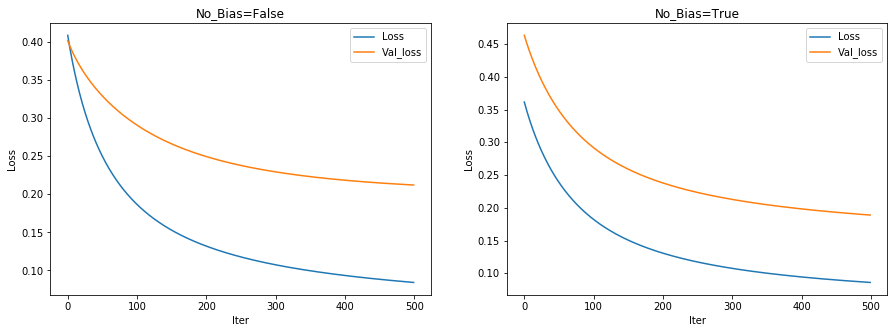

In [20]:
loss =  slr.loss
val_loss = slr.val_loss

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('No_Bias=False')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.plot(range(len(loss)), loss, label='Loss')
plt.plot(range(len(val_loss)), val_loss, label='Val_loss')
plt.legend()


loss =  slr_0.loss
val_loss = slr_0.val_loss

plt.subplot(1, 2, 2)
plt.title('No_Bias=True')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.plot(range(len(loss)), loss, label='Loss')
plt.plot(range(len(val_loss)), val_loss, label='Val_loss')
plt.legend()
plt.show()

## Scikitlern

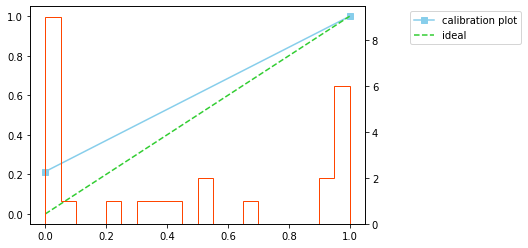

In [21]:
from sklearn.calibration import calibration_curve

#clf_predict_proba = clf.predict_proba(X_test_transformed)

prob = clf.predict_proba(X_test_transformed)[:, 1] # 目的変数が1である確率を予測
prob_true, prob_pred = calibration_curve(y_true=y_test, y_prob=clf_predict, n_bins=20)

fig, ax1 = plt.subplots()
ax1.plot(prob_pred, prob_true, marker='s', label='calibration plot', color='skyblue') # キャリプレーションプロットを作成
ax1.plot([0, 1], [0, 1], linestyle='--', label='ideal', color='limegreen') # 45度線をプロット
ax1.legend(bbox_to_anchor=(1.12, 1), loc='upper left')
ax2 = ax1.twinx() # 2軸を追加
ax2.hist(prob, bins=20, histtype='step', color='orangered') # スコアのヒストグラムも併せてプロット
plt.show()

### ネットで見つけたものをそのまま出力

# 【問題8】決定領域の可視化
決定領域を可視化してください。

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

## Plot

In [23]:
features_2_X = X_train_transformed[:,[0,2]]
print(features_2_X.shape)

(75, 2)


In [24]:
#特徴量をsepallength, petallengthにする。
new = X_train_transformed[:, [0, 2]]

#y_trainを1次元にする
y_new = y_train.values.reshape(-1)
y_new.shape

(75,)

In [25]:
# 学習(biasFalse, verbos=False)
# Scrtchモデルを特徴量2の訓練データを学習させる。
clf_slr = ScratchLogisticRegression(num_iter=500, lr=0.1, bias=False, verbose=False)
clf_slr.fit(new, y_train)


In [26]:
# Sklearnモデルを特徴量2の訓練データを学習させる。
clf_new = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(new, y_new) #訓練用データを学習させる
clf_new.fit(new, y_new)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

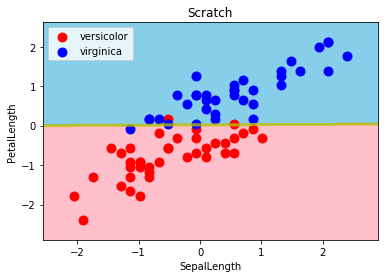

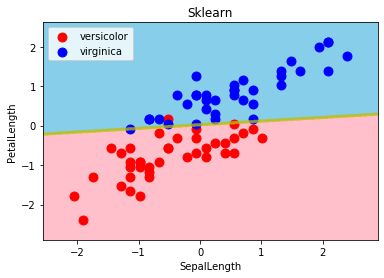

In [27]:
#Scratch
decision_region(new, y_new, clf_slr, title='Scratch', xlabel='SepalLength', ylabel='PetalLength', target_names=['versicolor', 'virginica'])
#Sklearn
decision_region(new, y_new, clf_new, title='Sklearn', xlabel='SepalLength', ylabel='PetalLength', target_names=['versicolor', 'virginica'])


In [28]:
100/=10

SyntaxError: can't assign to literal (<ipython-input-28-9910821e60a4>, line 1)